 # NEURAL NETWORK CLASSIFICATION WITH PyTorch

 A classification problem involves predicting whether something is one thing or another.

## Make classification data and get it read

In [47]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import sklearn
print(sklearn.__version__)


1.6.1


In [48]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000  #Make 1000 samples

X, y = make_circles(n_samples,  #create circles
                    noise = 0.03,
                    random_state =42)

In [45]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [72]:
!pip install pandas
import pandas
print(pandas.__version__)
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)


Defaulting to user installation because normal site-packages is not writeable
2.2.3



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [73]:
# Check different labels
circles.label.value_counts()


label
1    500
0    500
Name: count, dtype: int64

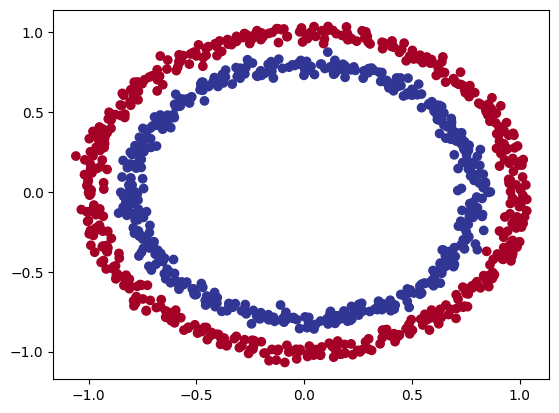

In [74]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).m

## Input and output shapes

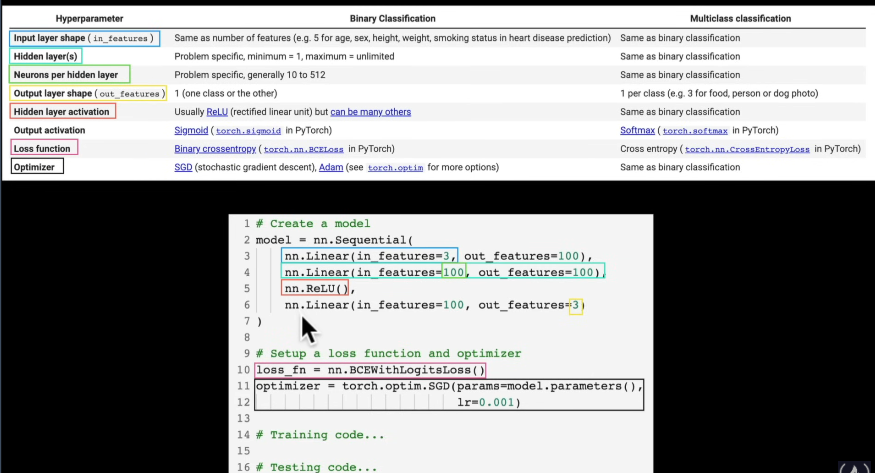

In [75]:
X.shape, y.shape

((1000, 2), (1000,))

In [76]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [82]:
#View the first example of the features and lables

X_sample = X[0]
y_sample = y[0]

print(X_sample)
print(X_sample.shape)
print(y_sample)
print(y_sample.shape)



[0.75424625 0.23148074]
(2,)
1
()


# Turn data into tensors and cretae train and test splits

In [84]:
import torch
torch.__version__

'2.7.0+cpu'

In [86]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [87]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [88]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)



(800, 200, 800, 200)

In [90]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a Model
* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing `nn.Module`.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).



In [94]:
import torch
torch.cuda.is_available()


False

In [95]:
import torch
from torch import nn

#Make devide agnostic code
devide = "cuda" if torch.cuda.is_available() else "cpu"

NameError: name 'fro' is not defined